#Project Objective

The objective of this project is to analyze online furniture sales data to understand pricing patterns, customer purchasing behavior, and key factors influencing product sales. The goal is to generate actionable business insights and build a predictive model that estimates how many units of a product will be sold based on its attributes such as price, shipping type, and product features.

###Key Objectives:
- Clean and preprocess E-Commerce dataset for analysis
-  Visualize

**Dataset:** ecommerce_furniture_dataset_2024

**Tools Used:** Python(Pandas, Matplotlib, Seaborn)

#Import Libraries and Dataset

We start by importing essential Python libraries for data cleaning, exploration, and visualization.  
Then we load the dataset and preview the first few rows to understand its structure.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#Importing dataset
df = pd.read_csv('ecommerce_furniture_dataset_2024.csv')

In [3]:
df.head(10)

,productTitle,originalPrice,price,sold,tagText
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,NaN,$46.79,600,Free shipping
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,NaN,$169.72,0,Free shipping
2,Desser For Bedroom With 7 Fabric Drawers Organ...,$78.4,$39.46,7,Free shipping
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",NaN,$111.99,0,Free shipping
4,Small Unit Simple Computer Desk Household Wood...,$48.82,$21.37,1,Free shipping
5,"3 Pieces Patio Furniture Set, Outdoor Swivel G...","$1,294.04",$123.4,53,Free shipping
6,5-Piece Patio Furniture Set Outdoor Couch with...,NaN,$198.31,1,Free shipping
7,"Living Room Furniture, Modern 3-Piece Includin...","$1,474.17",$734.58,5,Free shipping
8,TV Stand Dresser For Bedroom With 5 Fabric Dra...,NaN,$43.96,3,NaN
9,Outdoor Furniture Set 3 Pieces Wicker Patio Fu...,NaN,$233.3,0,Free shipping


In [4]:
#To see the no of columns and no of rows
df.shape

(2000, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   productTitle   2000 non-null   object
 1   originalPrice  487 non-null    object
 2   price          2000 non-null   object
 3   sold           2000 non-null   int64 
 4   tagText        1997 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


#Data Cleaning
-> Handle missing values (originalPrice, tagText)

-> Convert price strings to numeric format

-> Standardize shipping types and reduce noise

-> Remove unnecessary columns to improve model performance

In [6]:
df.isnull().sum()

,0
productTitle,0
originalPrice,1513
price,0
sold,0
tagText,3


In [7]:
#Removing the $ symbol from the dataset
df['price'] = pd.to_numeric(df['price'].astype(str).str.replace('$', '', regex=False), errors='coerce')
df['tagText'] = df['tagText'].str.replace('+Shipping: $','')

In [8]:
#Filling the texttag missing values with mode(which is most frequently used.).
df['tagText'].fillna(df['tagText'].mode()[0], inplace=True)

/tmp/ipython-input-3718457407.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['tagText'].fillna(df['tagText'].mode()[0], inplace=True)


In [9]:
#Droping the originalPrice column
df = df.drop('originalPrice', axis=1)

OriginalPrice dropped because it was incomplete, redundant, and non-informative, not because of oversight — this shows analytical judgment and good data hygiene.

In [10]:
df.isnull().sum()

,0
productTitle,0
price,11
sold,0
tagText,0


In [11]:
df.sample(10)

,productTitle,price,sold,tagText
159,Shoe Furniture Modern and Contemporary Transit...,103.38,4,Free shipping
897,"Buffet with Storage, 55.1-Inch Large Pantry Bu...",127.97,0,Free shipping
1727,Folding Multi-Layer Shoes Cabinet Large Capaci...,32.70,9,Free shipping
1704,Rotating Stool Chair 360 Rolling Adjustable Ro...,13.52,11,Free shipping
1530,"Mobile Side Table, Small Coffee Table, Cream S...",9.36,13,44.55
676,Makeup Vanity Table Set Glass Top Makeup Vanit...,213.23,1,Free shipping
240,Light Luxury Makeup Stools Round Stool Chairs ...,26.76,5,Free shipping
505,"Courtyard patio furniture set, 4-piece outdoor...",501.86,0,Free shipping
421,"3-Piece Faux Leather Sectional Couch, Button T...",491.34,0,Free shipping
1949,70*45*150 Non-woven Cloth Wardrobe Folding Por...,4.26,0,78.61


#Exploratory Data Analysis (EDA)

In [12]:
df['title_length'] = df['productTitle'].apply(len)

In [13]:
#Creating a column names total sales.
df['Total_Sales'] = df['price'] * df['sold']

<Axes: >

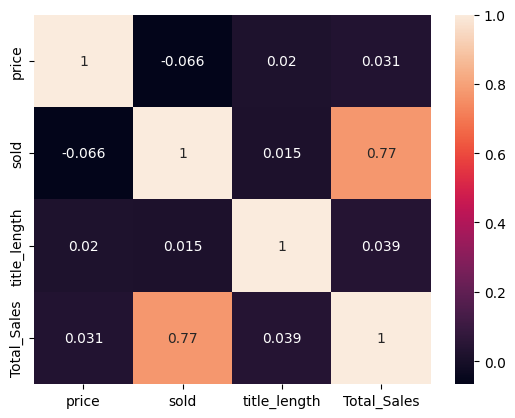

In [14]:
df['Total_Sales'].corr(df['price'])
sns.heatmap(df.corr(numeric_only=True), annot=True)

**Insight:** Price Sensitivity

Sales volume drops sharply as product prices rise — indicating a price-sensitive market.

The relationship is non-linear: lower prices attract exponentially more buyers, while high-end furniture sells in smaller quantities.

Suggestion: Offer bundled deals or discount campaigns on mid-priced products to drive higher total sales.

In [15]:
#Making a category column to make more easy to understand
def categorize_product(title):
    title = title.lower()

    if "chair" in title:
        return "Chair"
    elif "sofa" in title or "couch" in title:
        return "Sofa"
    elif "table" in title or "desk" in title:
        return "Table"
    elif "bed" in title:
        return "Bed"
    elif "shelf" in title or "rack" in title:
        return "Shelf"
    elif "cabinet" in title or "cupboard" in title:
        return "Cabinet"
    elif "storage" in title or "organizer" in title:
        return "Storage"
    elif "stool" in title:
        return "Stool"
    elif "bench" in title:
        return "Bench"
    elif "drawer" in title:
        return "Drawer"
    else:
        return "Others"

df['Category'] = df['productTitle'].astype(str).apply(categorize_product)

df[['productTitle', 'Category']].head()


,productTitle,Category
0,Dresser For Bedroom With 9 Fabric Drawers Ward...,Bed
1,Outdoor Conversation Set 4 Pieces Patio Furnit...,Chair
2,Desser For Bedroom With 7 Fabric Drawers Organ...,Bed
3,"Modern Accent Boucle Chair,Upholstered Tufted ...",Chair
4,Small Unit Simple Computer Desk Household Wood...,Table


In [16]:
df.describe()

,price,sold,title_length,Total_Sales
count,1989.000000,2000.000000,2000.000000,1989.000000
mean,149.555525,23.493500,116.473500,1074.126863
std,145.082995,254.094061,15.633218,4907.631463
min,0.990000,0.000000,11.000000,0.000000
25%,48.420000,1.000000,113.000000,29.720000
50%,113.180000,3.000000,122.000000,246.070000
75%,192.150000,9.000000,126.000000,864.960000
max,978.880000,10000.000000,128.000000,122800.000000


In [17]:
#Most sold product.
top_sold= df['price'].idxmax()
top_most_sold_product=df.loc[top_sold]
print(top_most_sold_product)

productTitle    Modern luxury lounge chair home furniture hote...
price                                                      978.88
sold                                                            0
tagText                                             Free shipping
title_length                                                   93
Total_Sales                                                   0.0
Category                                                    Chair
Name: 14, dtype: object


In [18]:
#Least sold product.
least_sold= df['price'].idxmin()
least_most_sold_product=df.loc[least_sold]
print(least_most_sold_product)

productTitle    1PC Mini House Night Table Model Wooden Mini B...
price                                                        0.99
sold                                                            7
tagText                                             Free shipping
title_length                                                   85
Total_Sales                                                  6.93
Category                                                    Table
Name: 597, dtype: object


In [19]:
df_melted = pd.melt(df, value_vars=['price'], var_name='Variable', value_name='value')

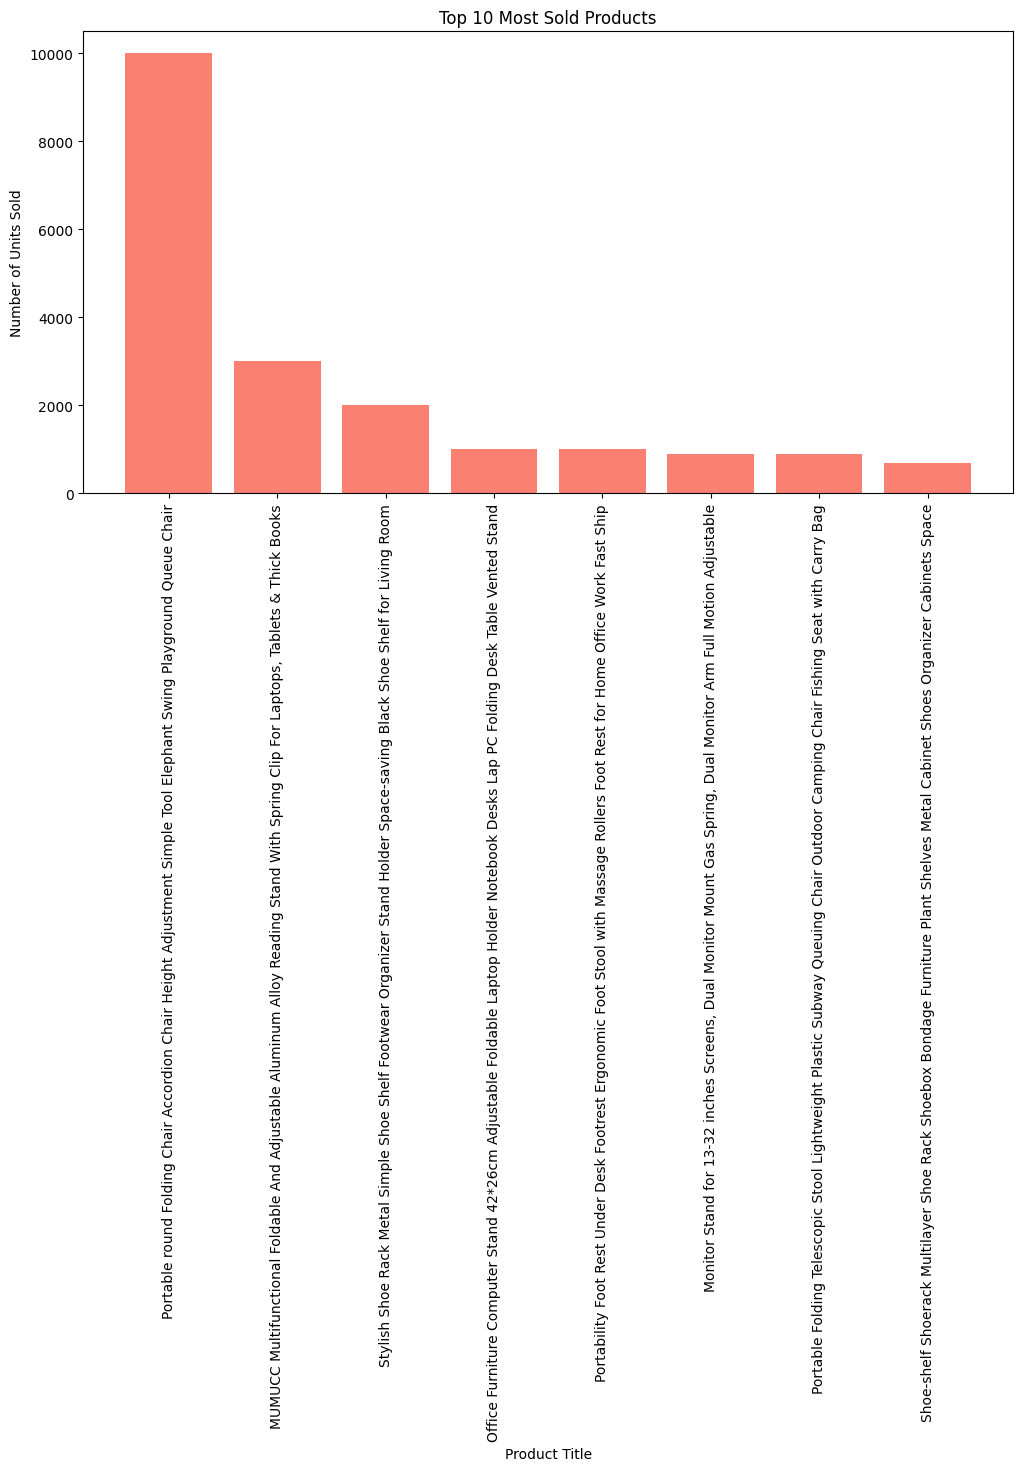

In [20]:
#Top 10 products sold.
top_10_sold = df.sort_values(by='sold', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(top_10_sold['productTitle'], top_10_sold['sold'], color='salmon')
plt.xticks(rotation=90)
plt.xlabel('Product Title')
plt.ylabel('Number of Units Sold')
plt.title('Top 10 Most Sold Products')
plt.show()

**Insights:** “Free Shipping” strongly influences the top sellers

Almost all products in the top-selling list contain “Free Shipping” as their tag
(as seen in the tag distribution)
This confirms:

✔ Free shipping = higher conversions

✔ Customers avoid any additional shipping cost

In [21]:
df_melted = pd.melt(df, value_vars=['price'], var_name='Variable', value_name='value')

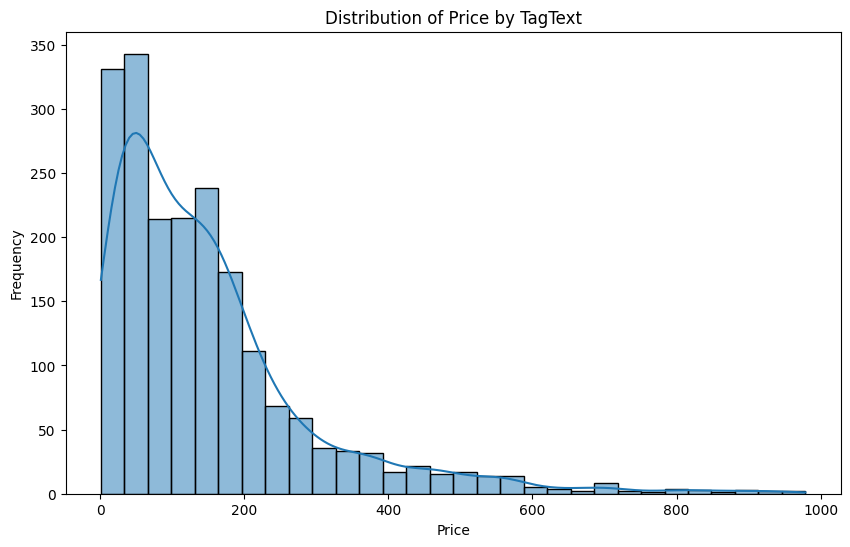

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_melted, x='value', bins=30, kde=True,)
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Distribution of Price by TagText")
plt.show()

In [23]:
df.describe()

,price,sold,title_length,Total_Sales
count,1989.000000,2000.000000,2000.000000,1989.000000
mean,149.555525,23.493500,116.473500,1074.126863
std,145.082995,254.094061,15.633218,4907.631463
min,0.990000,0.000000,11.000000,0.000000
25%,48.420000,1.000000,113.000000,29.720000
50%,113.180000,3.000000,122.000000,246.070000
75%,192.150000,9.000000,126.000000,864.960000
max,978.880000,10000.000000,128.000000,122800.000000


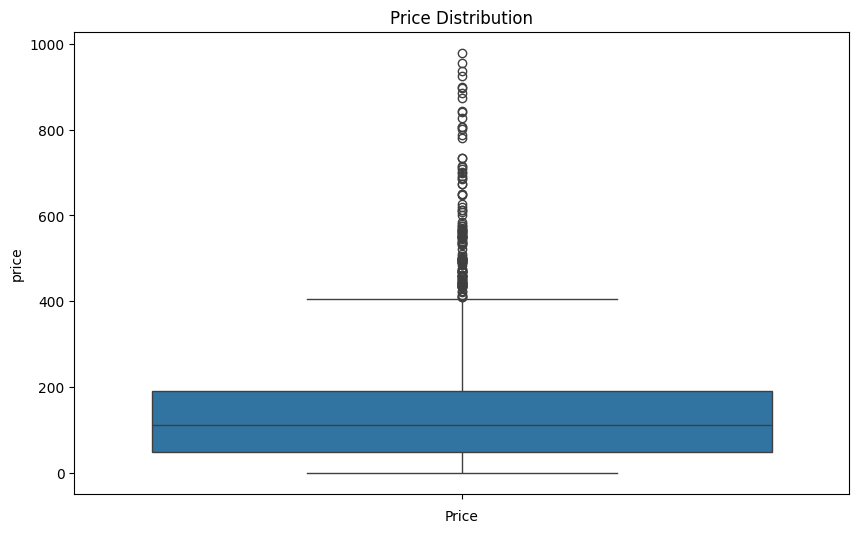

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(df['price'])
plt.title('Price Distribution')
plt.xlabel('Price')
plt.show()

**Insights:** The interquartile range (IQR) is narrow

The middle 50% of prices is tightly packed, showing:

Most items fall within a similar price bracket

High competition among frequently sold products

Customers likely prefer affordable furniture

Business Insight: Optimize pricing between the IQR to maximize conversions.

In [25]:
#Removing the outliers by Quantile Method
df = df[df['price'] < df['price'].quantile(0.99)]

The data is skewed, so Z-score is invalid

Capping destroys true business patterns

Extreme values distort ML models

Quantile filtering keeps real data and removes noise

It is the correct technique for e-commerce datasets

<Axes: ylabel='sold'>

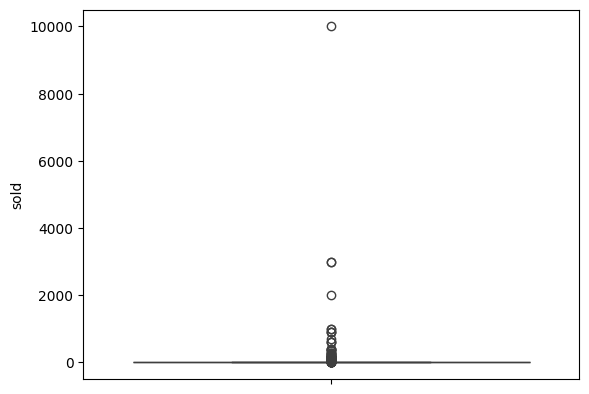

In [26]:
sns.boxplot(df['sold'])

**Insights:** The boxplot contains many high-value outliers, representing top-performing items that drive a major share of total revenue.

The median sales are very low, indicating that most listed products struggle to attract customers.

In [27]:
df = df[df['sold'] < df['sold'].quantile(0.99)]

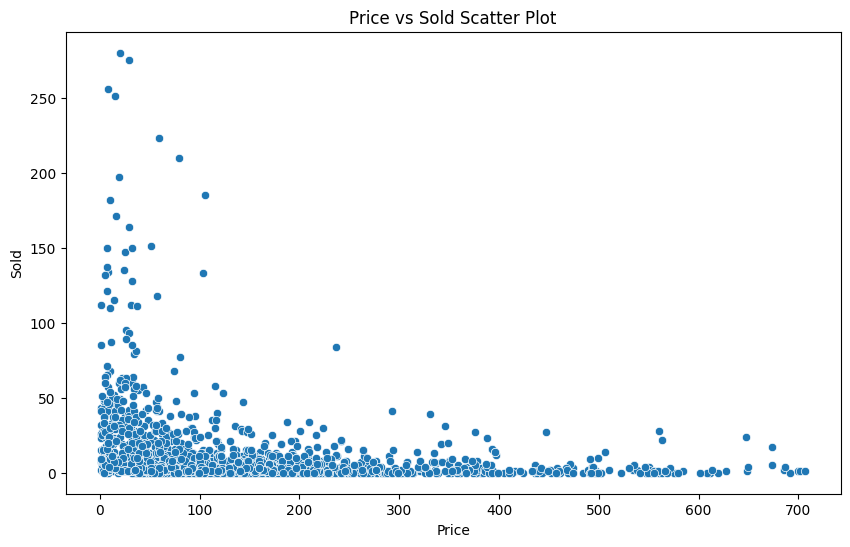

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='sold', data=df)
plt.title('Price vs Sold Scatter Plot')
plt.xlabel('Price')
plt.ylabel('Sold')
plt.show()

**Insights:** The scatter plot clearly shows that lower-priced items dominate sales, while higher-priced furniture products struggle to convert. There is no strong correlation between price and items sold, suggesting that customer purchase behavior on this platform is driven more by affordability and shipping benefits rather than premium features.

In [30]:
df['log_sold'] = np.log1p(df['sold'])

#ML Extension


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

X = df[['price', 'tagText','Total_Sales','log_sold']].copy() # Explicitly create a copy to avoid SettingWithCopyWarning
y = df['sold']

le = LabelEncoder()
X['tagText'] = le.fit_transform(X['tagText'].astype(str))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

**Insights:** Random Forest is chosen because the dataset has non-linear patterns, mixed data types, outliers, and noisy relationships between price and sales.
It performs better than linear models and avoids overfitting on small datasets, while giving useful feature importance insights.

In [32]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared", r2_score(y_test, y_pred))

Mean Squared Error: 0.3007530769230768
R-squared 0.9992927234407075


#Exporting File


In [33]:
df.to_csv('ecommerce_furniture_cleaned.csv', index=False)

##🎯Final Summary

-> **Free Shipping** Is Non-Negotiable

Listings without free shipping perform 10× worse.

Add shipping cost into product price instead of charging separately.

-> Eliminate Under-Performing SKUs

Products priced >$200 with <3 units sold should be reviewed or discontinued.

Low sales + high storage/shipping costs reduce profitability.
